# Verbindung von Fehlerwahrscheinlichkeiten und wechselseitiger Information

## MAP- und ML-Detektion

Nach Matched-Filterung und Abtastung wird am Empfänger eine Datenentscheidung durchgeführt. Diese kann nach verschiedenen Kriterien erfolgen. Im Folgenden gehen wir von der Annahme aus, dass keine Intersymbolinterferenzen auftreten (1. Nyquist-Bedingung ist erfüllt) und nur Rauschen die Übertragung stört. Das Empfangssymbol lautet daher

\begin{equation}
    y = x + n \; .
\end{equation}

Der Maximum-A-Posteriori-Detektor (MAP) maximiert die a-posteori-Wahrscheinlichkeit $\Pr\{ \tilde{x} \mid y \}$. Sie kann mit Hilfe der Regel von Bayes zu

\begin{equation}
    \Pr\{ \tilde{x} \mid y \} = p(y \mid \tilde{x}) \cdot \frac{\Pr\{ \tilde{x}\}}{p(y)}
\end{equation}

umformuliert werden. Der MAP-Detektor lautet damit

\begin{equation}
    \hat{x}^{\mathsf{MAP}}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Big[ p(y \mid \tilde{x}) \cdot \Pr\{ \tilde{x}\} \Big] \; .
\end{equation}

Es ist zu erkennen, dass er sowohl von der Likelihood-Funktion $p(y \mid \tilde{x})$ als auch von der a-priori-Verteilung $\Pr\{ \tilde{x}\}$ der Datensymbole abhängt. Der MAP-Detektor balanciert in optimaler Weise die Signifikanz von Beobachtung $y$ und a-priori-Wissen aus und bestimmt basierend auf beiden Informationsquellen das am wahrscheinlichsten gesendete Symbol.

Treten alle Datensymbole  mit der gleichen Wahrscheinlichkeit auf, wird der Term $\Pr\{ \tilde{x}\}$ zu einem konstanten Faktor und kann entfallen. Dann erhalten wir den Maximum-Likelihood-Detektor

\begin{equation}
    \hat{x}^{\mathsf{ML}} = \arg \! \max_{\tilde{x} \in \mathbb{X}} p(y \mid \tilde{x}) \; .
\end{equation}

Die Likelihood-Funktion gibt die Wahrscheinlichkeitsdichte von $y$ bei gegebenem $\tilde{x}$ an und stellt daher für $\tilde{x}=x$ die Verteilung des Rauschens dar.

Für den Fall eines AWGN-Kanals (additives weißes gaußverteiltes Rauschen) lassen sich die Audrücke für MAP- und ML-Detektor weiter konkretisieren. Ohne Beschränkung der Allgmeingültigkeit kann der natürliche Logarithmus auf die obigen Ausdrücke angewendet werden, da er eine monoton steigende Funktion darstellt und die Position des Maximums nicht verändert. Wir erhalten dann die Ausdrücke

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[ \log p(y \mid \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big]
     = \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big] \\
     &= \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - \tilde{x}|^2 -\sigma_{\cal N}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid \tilde{x})
     = \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - \tilde{x}|^2 \; .
\end{align*}

Der ML-Detektor such also bei gaußverteiltem Rauschen das Datensymbol aus der Menge $\mathbb{X}$, welches den kleinsten euklidischen Abstand zum Empfangswert $y$ hat. Beim MAP-Detektor wird dieser Abstand noch durch die Auftrittswahrscheinlichkeit der Hypothese $\tilde{x}$ korrigiert. Für sehr starkes Rauschen ist die Varianz $\sigma_{\cal N}^2$ groß und dominiert die Datenentscheidung, da der Empfangswert $y$ sehr unzuverlässig ist. Bei hohem SNR (kleines $\sigma_{\cal N}^2$) dominiert hingegen der Empfangswert $y$ die Entscheidung weil er sehr zuverlässig ist.


## Symbolfehlerwahrscheinlichkeiten

Ein Detektionsfehler tritt immer dann auf, wenn der Detektor sich für ein anderes als das gesendete Symbol entscheidet, d.h. $\hat{x} \neq x$. Dies passiert bei gaußverteiltem Rauschen entsprechend der obigen Ausführungen immer dann, wenn ein anderes Symbol $\tilde{x} \neq x$ dichter am Empfangswert $y$ liegt als das gesendet Symbol $x$. Die Wahrscheinlichkeit für Fehlerereignisse hängt vom jeweiligen Modulationsverfahren ab. Ihre Berechnung erfordert die Integration der Likelihood-Funktion über einem bestimmten Intervall. Für gaußverteiltes Rauschen ergibt die Integration keine geschlossene analytische Lösung, weshalb die gaußsche Fehlerfunktion bzw. ihr Komplement verwendet werden. Sie lauten

\begin{align*}
    \mathrm{erf}(x) &= \frac{2}{\sqrt{\pi}} \cdot \int_0^x e^{- \xi^2} \ d\xi \\
    \mathrm{erfc}(x) &= 1 - \mathrm{erf}(x)
    = \frac{2}{\sqrt{\pi}} \cdot \int_x^{\infty} e^{- \xi^2} \ d\xi .
\end{align*}

und sind im unteren Diagramm darstellt.

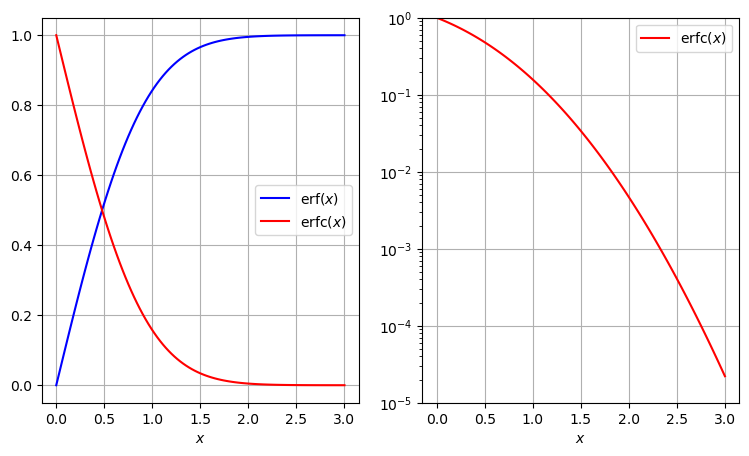

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

x = np.linspace(0,3,101)
ferf = erf(x)
ferfc = erfc(x)

fig1 = plt.figure(figsize=(9,5))
ax1a = fig1.add_subplot(121)
ax1a.plot(x, ferf, 'b-',label='$\mathrm{erf}(x)$')
ax1a.plot(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

ax1b = fig1.add_subplot(122)
ax1b.semilogy(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.ylim(1e-5,1)
plt.grid(True)
plt.legend()

Mit ihrer Hilfe lassen sich nun die Fehlerwahrscheinlichkeiten für verschiedene lineare Modulationsverfahren herleiten. Dabei spielt die kleinste, auf die mittlere Sendeleistung normierte quadratische euklidische Distanz 

\begin{equation}
    \Delta_0^2 = \min_{x,\tilde{x} \in \mathbb{X} \atop x \neq \tilde{x}} \frac{|x - \tilde{x}|^2}{\sigma_{\cal X}^2}
\end{equation}

des Signalalphabets eine wichtige Rolle. Die folgende Zusammenfassung der Ergebnisse gibt einen Überblick.

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}} 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{M^2-1} \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}} 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{2(M-1)} \frac{E_{\mathrm{s}}}{N_0} } \right) 
    = 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}} 
    &\approx \mathrm{erfc} \left( \sqrt{ \sin^2 \left( \frac{\pi}{M} \right) \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}

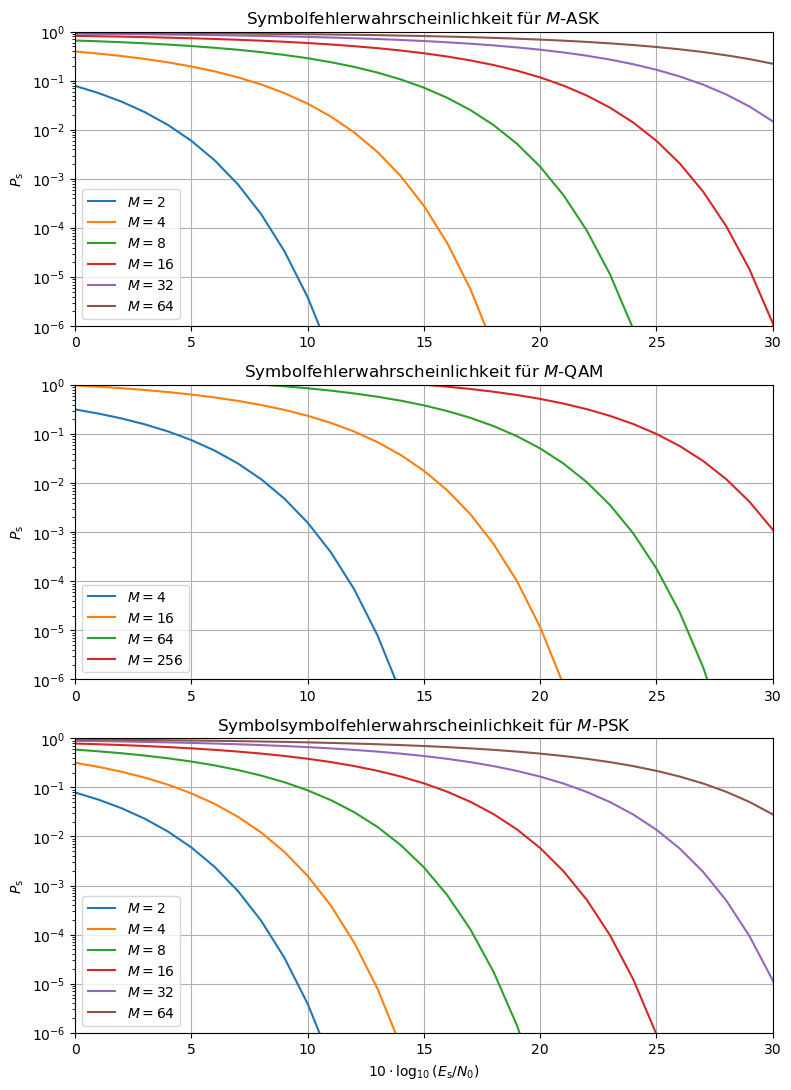

In [4]:
# definiton of signal to noise ratio
SNRdB = np.linspace(-10,40,51)
SNR = 10**(SNRdB/10)

# symbol error rates (SER) of ASK
M_ASK = np.array([2,4,8,16,32,64])
m_ASK = np.log2(M_ASK)
Mv,SNRv = np.meshgrid(M_ASK,SNR)
SER_ASK = (Mv-1)/Mv * erfc(np.sqrt(3.0/(Mv**2-1) * SNRv))

# symbol error rates (SER) of QAM
M_QAM = np.array([4,16,64,256])
m_QAM = np.log2(M_QAM)
Mv,SNRv = np.meshgrid(M_QAM,SNR)
SER_QAM = 2*(np.sqrt(Mv)-1)/np.sqrt(Mv) * erfc(np.sqrt(3.0/(2*(Mv-1)) * SNRv))

# symbol error rates (SER) of PSK
M_PSK = np.array([2,4,8,16,32,64])
m_PSK = np.log2(M_PSK)
SER_PSK = erfc(np.sqrt(np.outer(SNR,np.sin(np.pi/M_PSK)**2)))
# exact solution for M=2 (BPSK)
SER_PSK[:,0] = SER_PSK[:,0] / 2.0

fig2 = plt.figure(figsize=(9,13))
ax2a = fig2.add_subplot(311)
cntr = 0
for run in M_ASK:
    ax2a.semilogy(SNRdB, SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolfehlerwahrscheinlichkeit für $M$-ASK')
plt.legend()

ax2b = fig2.add_subplot(312)
cntr = 0
for run in M_QAM:
    ax2b.semilogy(SNRdB, SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolfehlerwahrscheinlichkeit für $M$-QAM')
plt.legend()

ax2c = fig2.add_subplot(313)
cntr = 0
for run in M_PSK:
    ax2c.semilogy(SNRdB, SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{s}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolsymbolfehlerwahrscheinlichkeit für $M$-PSK')
plt.legend()

## Symbolfehlerwahrscheinlichkeit über Energieeffizienz

Benutzt man statt der mittleren Energie pro Symbol die mittlere Energie je Bit mit dem Zusammenhang $E_{\mathrm{s}}=m \cdot E_{\mathrm{b}}$, wobei $m$ die Anzahl der Bit je Symbol repräsentiert, ergeben sich die unten dargestellten Kurven. Diese Darstellung ist insbesondere aus informationstheoretischer Sicht interessant, da nicht das physikalisch messbare SNR genutzt wird, sondern die eingesetzte Energie pro Informationsbit auf die spektrale Rauschleistungsdichte bezogen wird. Sie entsprechen den obigen Fehlerratenkurven, sind aber um $10 \log_{10} m$ verschoben, da

\begin{equation*}
    \frac{E_{\mathrm{s}}}{N_0} = m \cdot \frac{E_{\mathrm{b}}}{N_0}
    \qquad \Rightarrow \qquad
    10 \log_{10} \frac{E_{\mathrm{s}}}{N_0} 
    = 10 \log_{10}(m) + 10 \log_{10} \frac{E_{\mathrm{b}}}{N_0}    
\end{equation*}

gilt. Damit ändert sich die horizontale Lage der Kurven zueinandern.

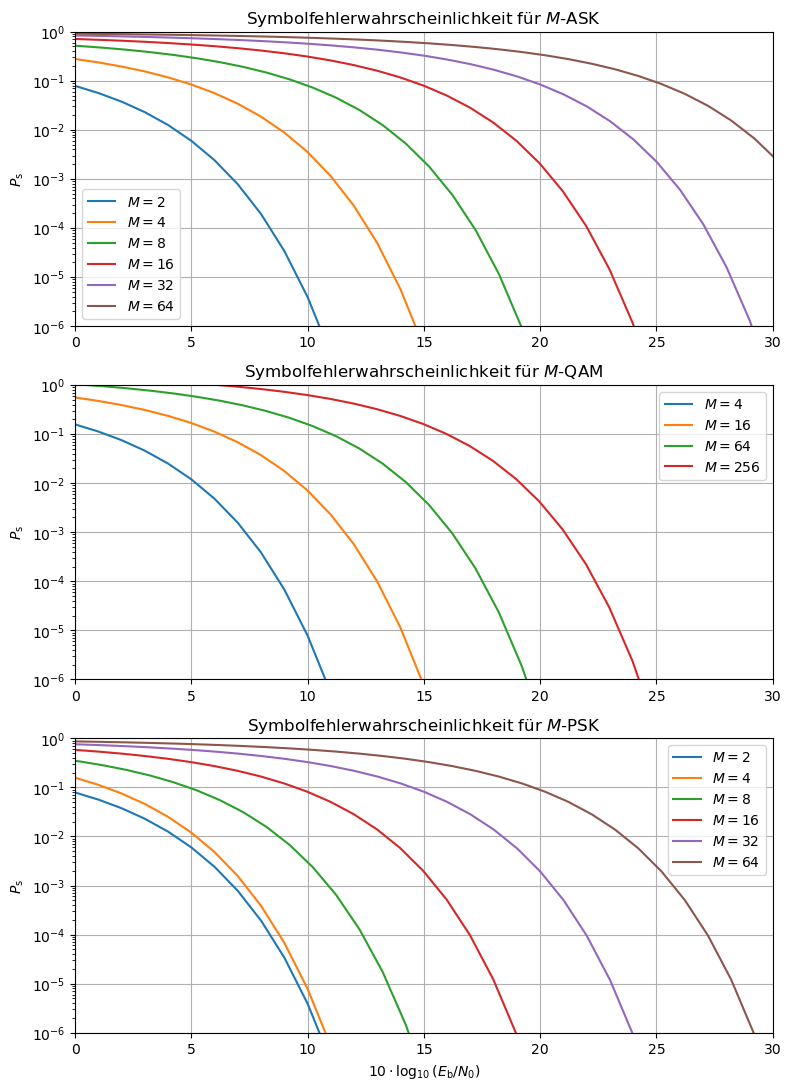

In [5]:
fig3 = plt.figure(figsize=(9,13))
ax6 = fig3.add_subplot(311)
cntr = 0
for run in M_ASK:
    ax6.semilogy(SNRdB-10*np.log10(m_ASK[cntr]), SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolfehlerwahrscheinlichkeit für $M$-ASK')
plt.legend()

ax3a = fig3.add_subplot(312)
cntr = 0
for run in M_QAM:
    ax3a.semilogy(SNRdB-10*np.log10(m_QAM[cntr]), SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolfehlerwahrscheinlichkeit für $M$-QAM')
plt.legend()

ax3b = fig3.add_subplot(313)
cntr = 0
for run in M_PSK:
    ax3b.semilogy(SNRdB-10*np.log10(m_PSK[cntr]), SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{b}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Symbolfehlerwahrscheinlichkeit für $M$-PSK')
plt.legend()

## Wechselseitige Information (Mutual Information)

Bei der Übertragung über einen AWGN-Kanal wird das Informationssignal $x$ durch weißes, gaußverteiltes Rauschen $n$ überlagert, es gilt $y=x+n$. Die Transinformation erhält man gemäß Definition aus der Differenz der differentiellen Entropien

\begin{align}
    I({\cal X};{\cal Y}) &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) \; .
\end{align}

Der Term $h({\cal Y} \mid {\cal X})$ entspricht der differentiellen Entropie $h({\cal N})$ des Rauschens und ist bei gegebener Rauschleistung konstant. Für digitale Modulationsverfahren mit diskreten Alphabeten wie ASK, QAM und PSK gibt es keine einfachen analytischen Ausdrücke für die Transinformation. Der Grund dafür ist, dass die für die Berechnung von $h({\cal Y)$ benötigte Wahrscheinlichkeitsdichte

\begin{align}
    p(y) = \sum_{x \in \mathbb{X}} p(y \mid x) \cdot \Pr \{ x\}
\end{align}

aus einer Summe von Termen besteht, die das Argument des Logarithmus bilden und sich nicht mehr vereinfachen lassen. Die Transinformation

\begin{align}
    I({\cal X};{\cal Y}) 
    = \sum_{x \in \mathbb{X}} \Pr\{ x \} \cdot 
      \int_{-\infty}^{\infty} p(y \mid x) \cdot \log_2 \frac{p(y \mid x)}{p(y)} \ dy
\end{align}

lässt sich daher nur numerisch berechnen. Die Einheit der Transinformation ist bit/s/Hz, also eine auf die Bandbreite normierte Datenrate. Man spricht daher auch von spektraler Effizienz.

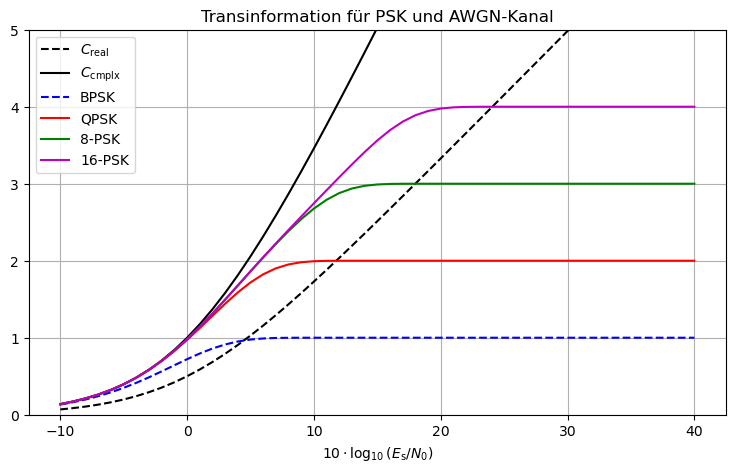

In [6]:
from info_theory import mi_awgn

Cgauss_real = 0.5 * np.log2(1+SNR)
Cgauss_cmplx = np.log2(1+SNR)

I_PSK = np.zeros((len(SNRdB),len(M_PSK)))
cntr = 0
for M in M_PSK:
    PSK = (np.exp(1j*2.0*np.pi*np.arange(M)/M), np.ones(M)/M)
    I_PSK[:,cntr] = mi_awgn(PSK[0],PSK[1],SNRdB,100)
    cntr += 1
    
fig4 = plt.figure(figsize=(9,5))
ax4 = fig4.add_subplot(111)
ax4.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax4.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax4.plot(SNRdB, I_PSK[:,0], 'b--', label='BPSK')
ax4.plot(SNRdB, I_PSK[:,1], 'r-', label='QPSK')
ax4.plot(SNRdB, I_PSK[:,2], 'g-', label='8-PSK')
ax4.plot(SNRdB, I_PSK[:,3], 'm-', label='16-PSK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für PSK und AWGN-Kanal')
plt.grid()

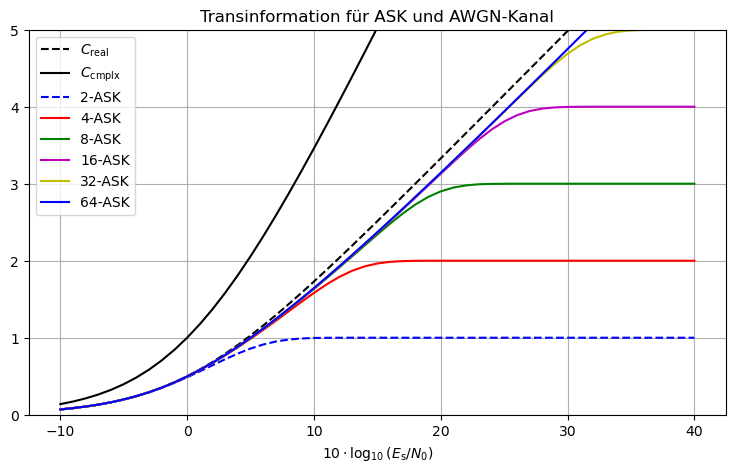

In [7]:
# ASK
I_ASK = np.zeros((len(SNRdB),len(M_ASK)))
cntr = 0
for M in M_ASK:
    ASK = (M-1-2*np.arange(M), np.ones(M)/M)
    I_ASK[:,cntr] = mi_awgn(ASK[0],ASK[1],SNRdB,100)
    cntr += 1
    
fig5 = plt.figure(figsize=(9,5))
ax5 = fig5.add_subplot(111)
ax5.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax5.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax5.plot(SNRdB, I_ASK[:,0], 'b--', label='2-ASK')
ax5.plot(SNRdB, I_ASK[:,1], 'r-', label='4-ASK')
ax5.plot(SNRdB, I_ASK[:,2], 'g-', label='8-ASK')
ax5.plot(SNRdB, I_ASK[:,3], 'm-', label='16-ASK')
ax5.plot(SNRdB, I_ASK[:,4], 'y-', label='32-ASK')
ax5.plot(SNRdB, I_ASK[:,5], 'b-', label='64-ASK')
plt.ylim(0,5)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für ASK und AWGN-Kanal')
plt.grid()


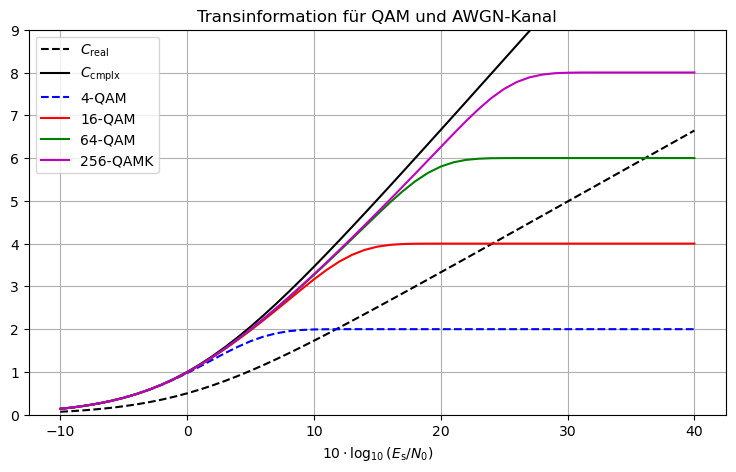

In [8]:
# QAM
I_QAM = np.zeros((len(SNRdB),len(M_QAM)))
cntr = 0
for M in M_QAM:
    sqrtM = int(np.sqrt(M))
    ASK = (sqrtM-1-2*np.arange(sqrtM), np.ones(sqrtM)/sqrtM)
    re,im = np.meshgrid(ASK[0],ASK[0])
    QAM = (np.reshape(re + 1j*im,(M,1)), np.reshape(np.outer(ASK[1],ASK[1]),(M,1)))
    I_QAM[:,cntr] = mi_awgn(QAM[0],QAM[1],SNRdB,100)
    cntr += 1
    
fig6 = plt.figure(figsize=(9,5))
ax6 = fig6.add_subplot(111)
ax6.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax6.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
ax6.plot(SNRdB, I_QAM[:,0], 'b--', label='4-QAM')
ax6.plot(SNRdB, I_QAM[:,1], 'r-', label='16-QAM')
ax6.plot(SNRdB, I_QAM[:,2], 'g-', label='64-QAM')
ax6.plot(SNRdB, I_QAM[:,3], 'm-', label='256-QAMK')
plt.ylim(0,9)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('Transinformation für QAM und AWGN-Kanal')
plt.grid()


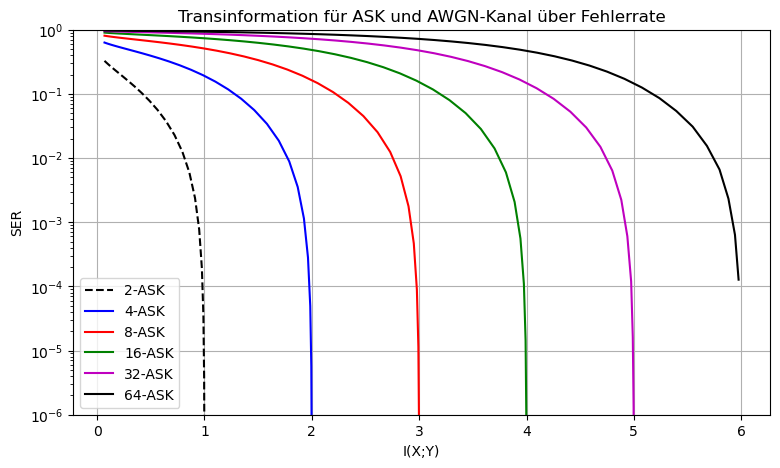

In [9]:
fig7 = plt.figure(figsize=(9,5))
ax7 = fig7.add_subplot(111)
ax7.semilogy(I_ASK[:,0], SER_ASK[:,0], 'k--', label='2-ASK')
ax7.semilogy(I_ASK[:,1], SER_ASK[:,1], 'b-', label='4-ASK')
ax7.semilogy(I_ASK[:,2], SER_ASK[:,2], 'r-', label='8-ASK')
ax7.semilogy(I_ASK[:,3], SER_ASK[:,3], 'g-', label='16-ASK')
ax7.semilogy(I_ASK[:,4], SER_ASK[:,4], 'm-', label='32-ASK')
ax7.semilogy(I_ASK[:,5], SER_ASK[:,5], 'k-', label='64-ASK')
plt.ylim(1e-6,1)
plt.legend()
plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('Transinformation für ASK und AWGN-Kanal über Fehlerrate')
plt.grid()

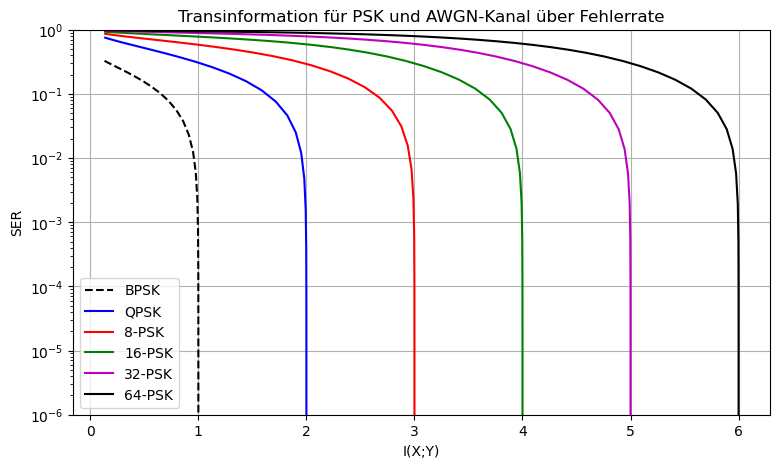

In [10]:
fig8 = plt.figure(figsize=(9,5))
ax8 = fig8.add_subplot(111)
ax8.semilogy(I_PSK[:,0], SER_PSK[:,0], 'k--', label='BPSK')
ax8.semilogy(I_PSK[:,1], SER_PSK[:,1], 'b-', label='QPSK')
ax8.semilogy(I_PSK[:,2], SER_PSK[:,2], 'r-', label='8-PSK')
ax8.semilogy(I_PSK[:,3], SER_PSK[:,3], 'g-', label='16-PSK')
ax8.semilogy(I_PSK[:,4], SER_PSK[:,4], 'm-', label='32-PSK')
ax8.semilogy(I_PSK[:,5], SER_PSK[:,5], 'k-', label='64-PSK')
plt.ylim(1e-6,1)
plt.legend()
plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('Transinformation für PSK und AWGN-Kanal über Fehlerrate')
plt.grid()

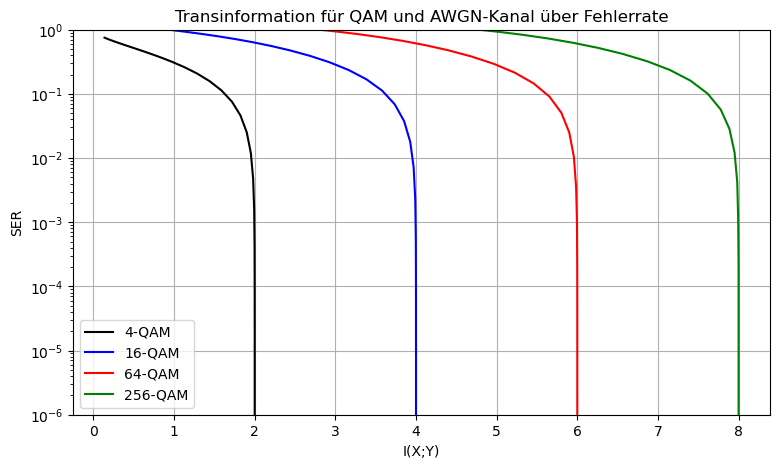

In [11]:
fig9 = plt.figure(figsize=(9,5))
ax9 = fig9.add_subplot(111)
ax9.semilogy(I_QAM[:,0], SER_QAM[:,0], 'k-', label='4-QAM')
ax9.semilogy(I_QAM[:,1], SER_QAM[:,1], 'b-', label='16-QAM')
ax9.semilogy(I_QAM[:,2], SER_QAM[:,2], 'r-', label='64-QAM')
ax9.semilogy(I_QAM[:,3], SER_QAM[:,3], 'g-', label='256-QAM')
plt.ylim(1e-6,1)
plt.legend()
plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('Transinformation für QAM und AWGN-Kanal über Fehlerrate')
plt.grid()